# Tweets about eating disorders
## Modelling with CV
 

In [4]:
import os
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
tweets = pd.read_csv('tweets2.csv', encoding='utf8', error_bad_lines=False)

In [5]:
tweets.head(2)

,Unnamed: 0,id_tweet,stream_group,text_orig,Commercial,POLITICS,ED,Family,ED_patience,ProED,Offensive,Informative,Scientific,Sad,hashtag,text,Segmented#
0,0,"1,31851E+34",1,RT @beatED: Learn more about anorexia and buli...,0,0,1,0.0,0,0,0,1,0,0.0,['BBCPanorama'],"['learn', 'anorexia', 'bulimia', 'well', 'eati...",bbc panorama
1,1,"1,31851E+34",1,A woman tries to balance her relationships wit...,0,0,1,0.0,0,0,0,0,0,0.0,"['anorexia', 'BodyofWater']","['woman', 'try', 'balance', 'relationship', 'm...",anorexia bodyof water


In [6]:
tweets.columns=['num1','id_tw','stream_group','text_orig','f1_commercial','f2_politics','f3_ed','f4_family','f5_edpatient','f6_proed','f7_offensive','f8_info','f9_scientific','f10_sad','hashtag','text','segmented']

In [7]:
cols=['f1_commercial','f2_politics','f3_ed','f4_family','f5_edpatient','f6_proed','f7_offensive','f8_info','f9_scientific','f10_sad']

In [8]:
'''for col in cols:
    print(tweets[col].value_counts(normalize=True)*100,'\n')'''

"for col in cols:\n    print(tweets[col].value_counts(normalize=True)*100,'\n')"

In [9]:
megaDF = pd.DataFrame()
megaDF.rename_axis('values')
cols2 = cols[:-1]
for col in cols2:
    df = tweets[col].value_counts(normalize=True).rename_axis('valores').to_frame(col)
    #df.plot.bar()
    #megaDF.concat([megaDF,df])
    megaDF = pd.concat([megaDF,df], axis=1)
    #plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'f1_commercial'),
  Text(1, 0, 'f2_politics'),
  Text(2, 0, 'f3_ed'),
  Text(3, 0, 'f4_family'),
  Text(4, 0, 'f5_edpatient'),
  Text(5, 0, 'f6_proed'),
  Text(6, 0, 'f7_offensive'),
  Text(7, 0, 'f8_info'),
  Text(8, 0, 'f9_scientific')])

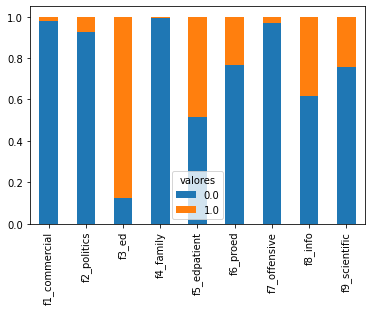

In [10]:
megaDF.T.plot.bar(stacked=True,rot=0)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'f5_edpatient'),
  Text(1, 0, 'f6_proed'),
  Text(2, 0, 'f8_info'),
  Text(3, 0, 'f9_scientific')])

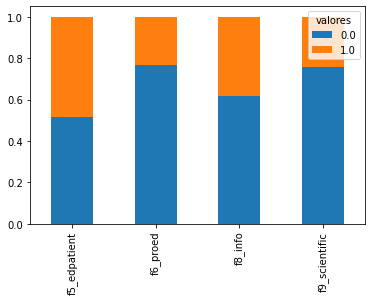

In [11]:
tweets1 = tweets.copy().drop(['f1_commercial', 'f2_politics', 'f3_ed', 'f4_family', 'f7_offensive', 'f10_sad'], axis=1)
megaDF=megaDF.drop(['f1_commercial', 'f2_politics', 'f3_ed', 'f4_family', 'f7_offensive'],axis=1)
megaDF.T.plot.bar(stacked=True,rot=0)
plt.xticks(rotation=90)

In [12]:
import pandas as pd
import numpy as np

import spacy
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import regex as re
import string
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from simpletransformers.classification import ClassificationModel


import io

In [13]:
punctuations = "¡!#$%&'()*+,-./:;<=>¿?@[\]^_`{|}~"

def read_txt(filename):
    list = []
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.readlines()
        for line in data:
            list.append(str(line).replace('\n', ''))
    return list

stopwords = read_txt('spanish_stopwords.txt')

stemmer = SnowballStemmer('spanish')


def clean_accents(tweet):
    tweet = re.sub(r"[àáâãäå]", "a", tweet)
    tweet = re.sub(r"ç", "c", tweet)
    tweet = re.sub(r"[èéêë]", "e", tweet)
    tweet = re.sub(r"[ìíîï]", "i", tweet)
    tweet = re.sub(r"[òóôõö]", "o", tweet)
    tweet = re.sub(r"[ùúûü]", "u", tweet)
    tweet = re.sub(r"[ýÿ]", "y", tweet)

    return tweet

def clean_tweet(tweet, stem = False):
    tweet = tweet.lower().strip()
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    tweet = re.sub(r'http?:\/\/\S+', '', tweet)
    tweet = re.sub(r'www?:\/\/\S+', '', tweet)
    tweet = re.sub(r'\s([@#][\w_-]+)', "", tweet)
    tweet = re.sub(r"\n", " ", tweet)
    tweet = clean_accents(tweet)
    tweet = re.sub(r"\b(a*ha+h[ha]*|o?l+o+l+[ol]*|x+d+[x*d*]*|a*ja+[j+a+]+)\b", "<risas>", tweet)
    for symbol in punctuations:
        tweet = tweet.replace(symbol, "")
    tokens = []
    for token in tweet.strip().split():
        if token not in punctuations and token not in stopwords:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [14]:
tweets1['text_cleaned'] = tweets['text_orig'].apply(lambda s : clean_tweet(s))
#print(tweets1['text_cleaned'].head(5))

In [15]:
#tweets1.head(2)

In [43]:
df = tweets1.copy()
X = df['text_cleaned']
Y1 = df['f5_edpatient']
Y2 = df['f6_proed']
Y3 = df['f8_info']
Y4 = df['f9_scientific']

In [17]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, Y4, test_size=0.3, random_state=42)

In [18]:
y1_test.value_counts(normalize=True)

0    0.533333
1    0.466667
Name: f5_edpatient, dtype: float64

In [19]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MICROSOFT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
    


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, Y4, test_size=0.3, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X1_train, y1_train) 

y1_pred = classifier.predict(X1_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))


[[255  65]
 [ 38 242]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       320
           1       0.79      0.86      0.82       280

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

0.8283333333333334


In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y2, test_size=0.3, random_state=42)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X1_train, y1_train) 

y1_pred = classifier.predict(X1_test)

print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))


[[431  36]
 [ 34  99]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       467
           1       0.73      0.74      0.74       133

    accuracy                           0.88       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.88      0.88      0.88       600

0.8833333333333333


In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y3, test_size=0.3, random_state=42)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X1_train, y1_train) 

y1_pred = classifier.predict(X1_test)

print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))


[[324  35]
 [ 66 175]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       359
           1       0.83      0.73      0.78       241

    accuracy                           0.83       600
   macro avg       0.83      0.81      0.82       600
weighted avg       0.83      0.83      0.83       600

0.8316666666666667


In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y4, test_size=0.3, random_state=42)

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X1_train, y1_train) 

y1_pred = classifier.predict(X1_test)

print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))


[[443  12]
 [ 25 120]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       455
           1       0.91      0.83      0.87       145

    accuracy                           0.94       600
   macro avg       0.93      0.90      0.91       600
weighted avg       0.94      0.94      0.94       600

0.9383333333333334


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [112]:
df = tweets1.copy()
X = df['text_cleaned']
Y1 = df['f5_edpatient']
Y2 = df['f6_proed']
Y3 = df['f8_info']
Y4 = df['f9_scientific']

In [113]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, Y4, test_size=0.3, random_state=42)

In [114]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X1_train)
sequences = tok.texts_to_sequences(X1_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [115]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(100)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.1)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [116]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_24 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_24 (LSTM)               (None, 100)               60400     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               25856     
_________________________________________________________________
activation_28 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)               

In [117]:
model.fit(sequences_matrix,y1_train,batch_size=64,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/20
18/18 [==============================] - 2s 103ms/step - loss: 0.6996 - accuracy: 0.6634 - val_loss: 0.5321 - val_accuracy: 0.7679
Epoch 2/20
18/18 [==============================] - 1s 83ms/step - loss: 0.3905 - accuracy: 0.8518 - val_loss: 0.4319 - val_accuracy: 0.8071
Epoch 3/20
18/18 [==============================] - 1s 83ms/step - loss: 0.2890 - accuracy: 0.8893 - val_loss: 0.4273 - val_accuracy: 0.8000
Epoch 4/20
18/18 [==============================] - 1s 83ms/step - loss: 0.2390 - accuracy: 0.9107 - val_loss: 0.4499 - val_accuracy: 0.8107


In [118]:
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [119]:
accr = model.evaluate(test_sequences_matrix,y1_test)

19/19 [==============================] - 0s 20ms/step - loss: 0.4671 - accuracy: 0.7867


In [120]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.467
  Accuracy: 0.787


In [98]:
# CATEGORY 2
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y2, test_size=0.3, random_state=42)


max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X1_train)
sequences = tok.texts_to_sequences(X1_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(sequences_matrix,y1_train,batch_size=64,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,y1_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               60400     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               25856     
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)               

array([[335, 132],
       [133,   0]], dtype=int64)

In [99]:
# CATEGORY 3
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y3, test_size=0.3, random_state=42)


max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X1_train)
sequences = tok.texts_to_sequences(X1_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(sequences_matrix,y1_train,batch_size=64,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,y1_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
matrix = sklearn.metrics.confusion_matrix(y1_test, y1_pred)
matrix

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               60400     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               25856     
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)               

array([[356,   3],
       [112, 129]], dtype=int64)

In [100]:
# CATEGORY 4
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y4, test_size=0.3, random_state=42)


max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X1_train)
sequences = tok.texts_to_sequences(X1_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(sequences_matrix,y1_train,batch_size=64,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,y1_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
matrix = sklearn.metrics.confusion_matrix(y1_test, y1_pred)
matrix

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               60400     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               25856     
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)               

array([[443,  12],
       [ 25, 120]], dtype=int64)

'rt learn more about anorexia and bulimia as well as other eating disorders here'

In [53]:
import tensorflow as tf

In [101]:
# CATEGORY 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=42)

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X1_train))

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy'])

history = model.fit(X1_train,y1_train, epochs=14,
                    validation_data=(X1_test,y1_test), 
                    validation_steps=30)

test_loss, test_acc = model.evaluate(X1_test,y1_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

matrix = sklearn.metrics.confusion_matrix(y1_test, y1_pred)
matrix

Epoch 1/14
44/44 [==============================] - 4s 85ms/step - loss: 0.6900 - accuracy: 0.5071 - val_loss: 0.6838 - val_accuracy: 0.5333
Epoch 2/14
44/44 [==============================] - 1s 22ms/step - loss: 0.6596 - accuracy: 0.5071 - val_loss: 0.6087 - val_accuracy: 0.5333
Epoch 3/14
44/44 [==============================] - 1s 23ms/step - loss: 0.5088 - accuracy: 0.6364 - val_loss: 0.4764 - val_accuracy: 0.7517
Epoch 4/14
44/44 [==============================] - 1s 23ms/step - loss: 0.3858 - accuracy: 0.8179 - val_loss: 0.4326 - val_accuracy: 0.8083
Epoch 5/14
44/44 [==============================] - 1s 22ms/step - loss: 0.3212 - accuracy: 0.8707 - val_loss: 0.4685 - val_accuracy: 0.8150
Epoch 6/14
44/44 [==============================] - 1s 22ms/step - loss: 0.2761 - accuracy: 0.8871 - val_loss: 0.4483 - val_accuracy: 0.8133
Epoch 7/14
44/44 [==============================] - 1s 23ms/step - loss: 0.2554 - accuracy: 0.9050 - val_loss: 0.4743 - val_accuracy: 0.8217
Epoch 8/14
44

array([[190, 130],
       [278,   2]], dtype=int64)

In [102]:
# CATEGORY 2
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y2, test_size=0.3, random_state=42)

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X1_train))

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy'])

history = model.fit(X1_train,y1_train, epochs=14,
                    validation_data=(X1_test,y1_test), 
                    validation_steps=30)

test_loss, test_acc = model.evaluate(X1_test,y1_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

matrix = sklearn.metrics.confusion_matrix(y1_test, y1_pred)
matrix

Epoch 1/14
44/44 [==============================] - 4s 92ms/step - loss: 0.6625 - accuracy: 0.7614 - val_loss: 0.5787 - val_accuracy: 0.7783
Epoch 2/14
44/44 [==============================] - 1s 25ms/step - loss: 0.4922 - accuracy: 0.7614 - val_loss: 0.4548 - val_accuracy: 0.7783
Epoch 3/14
44/44 [==============================] - 1s 25ms/step - loss: 0.4417 - accuracy: 0.7614 - val_loss: 0.4032 - val_accuracy: 0.7783
Epoch 4/14
44/44 [==============================] - 1s 26ms/step - loss: 0.3698 - accuracy: 0.7614 - val_loss: 0.3325 - val_accuracy: 0.7783
Epoch 5/14
44/44 [==============================] - 1s 26ms/step - loss: 0.3046 - accuracy: 0.7629 - val_loss: 0.2927 - val_accuracy: 0.7833
Epoch 6/14
44/44 [==============================] - 1s 25ms/step - loss: 0.2578 - accuracy: 0.8093 - val_loss: 0.2814 - val_accuracy: 0.8400
Epoch 7/14
44/44 [==============================] - 1s 25ms/step - loss: 0.2214 - accuracy: 0.8714 - val_loss: 0.2907 - val_accuracy: 0.8550
Epoch 8/14
44

array([[335, 132],
       [133,   0]], dtype=int64)

In [103]:
# CATEGORY 3
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y3, test_size=0.3, random_state=42)

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X1_train))

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy'])

history = model.fit(X1_train,y1_train, epochs=14,
                    validation_data=(X1_test,y1_test), 
                    validation_steps=30)

test_loss, test_acc = model.evaluate(X1_test,y1_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

matrix = sklearn.metrics.confusion_matrix(y1_test, y1_pred)
matrix

Epoch 1/14
44/44 [==============================] - 4s 98ms/step - loss: 0.6863 - accuracy: 0.6243 - val_loss: 0.6782 - val_accuracy: 0.5983
Epoch 2/14
44/44 [==============================] - 1s 26ms/step - loss: 0.6544 - accuracy: 0.6243 - val_loss: 0.6397 - val_accuracy: 0.5983
Epoch 3/14
44/44 [==============================] - 1s 27ms/step - loss: 0.5613 - accuracy: 0.6250 - val_loss: 0.5286 - val_accuracy: 0.6383
Epoch 4/14
44/44 [==============================] - 1s 27ms/step - loss: 0.4339 - accuracy: 0.8014 - val_loss: 0.4494 - val_accuracy: 0.8267
Epoch 5/14
44/44 [==============================] - 1s 25ms/step - loss: 0.3448 - accuracy: 0.8786 - val_loss: 0.4258 - val_accuracy: 0.8383
Epoch 6/14
44/44 [==============================] - 1s 26ms/step - loss: 0.2993 - accuracy: 0.8943 - val_loss: 0.4066 - val_accuracy: 0.8383
Epoch 7/14
44/44 [==============================] - 1s 26ms/step - loss: 0.2561 - accuracy: 0.9136 - val_loss: 0.4051 - val_accuracy: 0.8533
Epoch 8/14
44

array([[356,   3],
       [112, 129]], dtype=int64)

In [105]:
# CATEGORY 4
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y4, test_size=0.3, random_state=42)

VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(np.asarray(X1_train))

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(2e-4),
              metrics=['accuracy'])

history = model.fit(X1_train,y1_train, epochs=14,
                    validation_data=(X1_test,y1_test), 
                    validation_steps=30)

test_loss, test_acc = model.evaluate(X1_test,y1_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

matrix = sklearn.metrics.confusion_matrix(y1_test, y1_pred)
matrix

Epoch 1/14
44/44 [==============================] - 3s 59ms/step - loss: 0.6706 - accuracy: 0.7543 - val_loss: 0.6250 - val_accuracy: 0.7583
Epoch 2/14
44/44 [==============================] - 1s 18ms/step - loss: 0.5618 - accuracy: 0.7543 - val_loss: 0.5238 - val_accuracy: 0.7583
Epoch 3/14
44/44 [==============================] - 1s 18ms/step - loss: 0.4697 - accuracy: 0.7543 - val_loss: 0.4103 - val_accuracy: 0.7583
Epoch 4/14
44/44 [==============================] - 1s 18ms/step - loss: 0.3411 - accuracy: 0.8121 - val_loss: 0.3141 - val_accuracy: 0.9167
Epoch 5/14
44/44 [==============================] - 1s 18ms/step - loss: 0.2493 - accuracy: 0.9157 - val_loss: 0.2804 - val_accuracy: 0.9167
Epoch 6/14
44/44 [==============================] - 1s 18ms/step - loss: 0.2061 - accuracy: 0.9264 - val_loss: 0.2371 - val_accuracy: 0.9150
Epoch 7/14
44/44 [==============================] - 1s 18ms/step - loss: 0.1705 - accuracy: 0.9414 - val_loss: 0.2486 - val_accuracy: 0.9083
Epoch 8/14
44

array([[443,  12],
       [ 25, 120]], dtype=int64)